# Random Forests
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

Random forest or Random Decision Forest is a method that operates by constructing multiple decision trees during training phases. The decision of the majority of the trees is chosen as final decision.

### -> Random forest is an ensemble of decision trees

In [62]:
# "Import Libraries"

# Basic
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load Dataset
bank = pd.read_csv('bank.csv')

In [64]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [65]:
bank.shape

(11162, 17)

# Class Distribution

In [66]:
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

# Missing Values

In [67]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

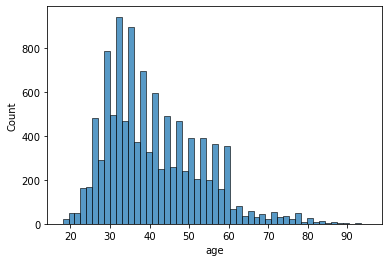

In [68]:
sns.histplot(bank['age'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


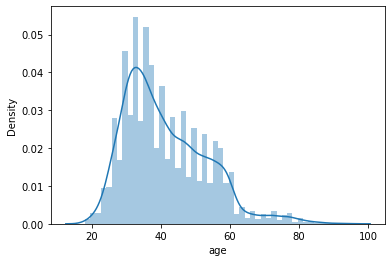

In [69]:
sns.distplot(bank['age'])
plt.show()

In [70]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [71]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [72]:
bank['job'].value_counts(), bank.shape

(management       2566
 blue-collar      1944
 technician       1823
 admin.           1334
 services          923
 retired           778
 self-employed     405
 student           360
 unemployed        357
 entrepreneur      328
 housemaid         274
 unknown            70
 Name: job, dtype: int64,
 (11162, 17))

In [73]:
bank['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [74]:
job_key = bank['job'].value_counts().keys()
job_key

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown'],
      dtype='object')

In [75]:
job_value = bank['job'].value_counts().values
job_value

array([2566, 1944, 1823, 1334,  923,  778,  405,  360,  357,  328,  274,
         70])

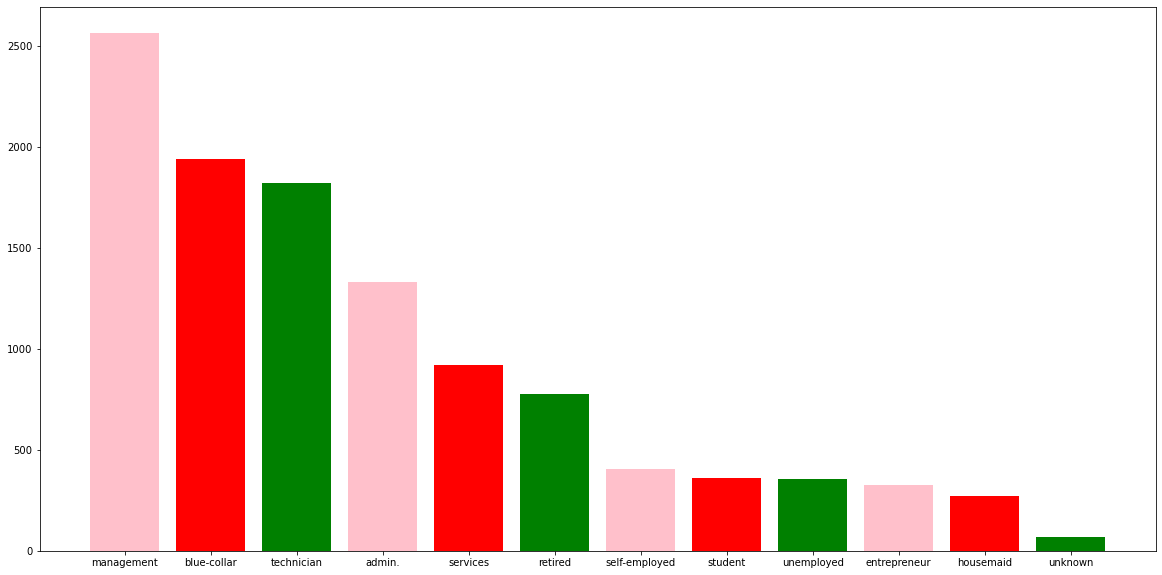

In [76]:
plt.figure(figsize = (20, 10))
plt.bar(job_key, job_value, data = bank, color = ['pink', 'red', 'green'])
plt.show()

# Or

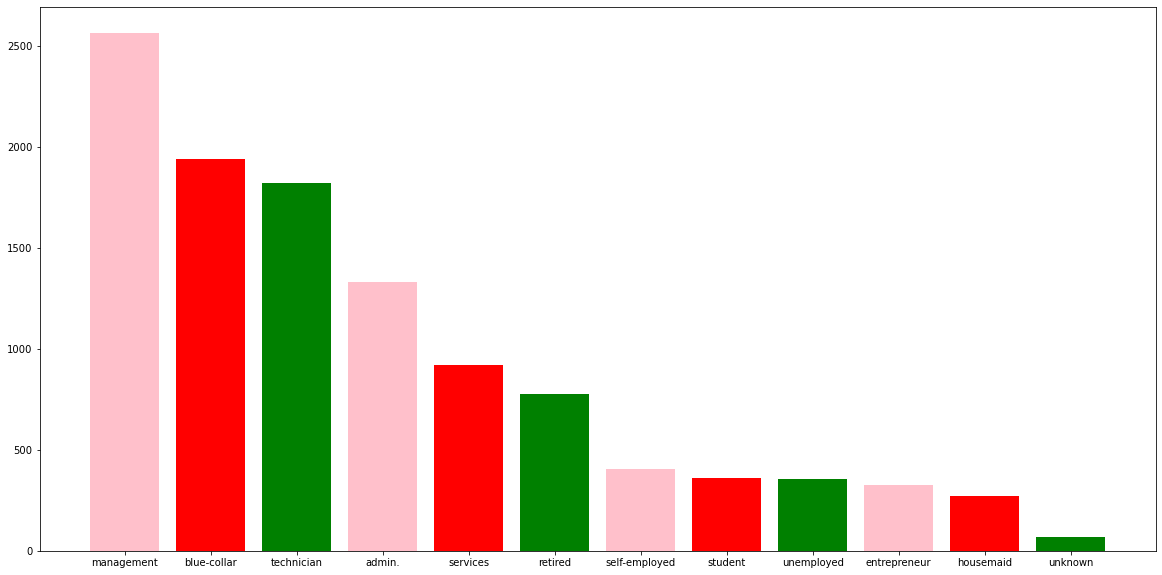

In [77]:
plt.figure(figsize = (20, 10))
plt.bar(list(bank['job'].value_counts().keys()), list(bank['job'].value_counts().values), data = bank, color = ['pink', 'red', 'green'])
plt.show()

In [78]:
marital_key = bank['marital'].value_counts().keys()
marital_key

Index(['married', 'single', 'divorced'], dtype='object')

In [79]:
marital_value = bank['marital'].value_counts().values
marital_value

array([6351, 3518, 1293])

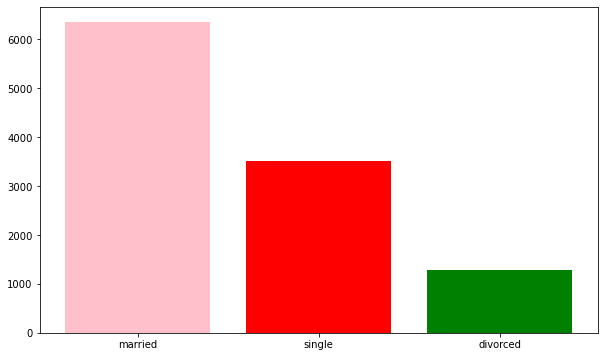

In [80]:
plt.figure(figsize = (10, 6))
plt.bar(marital_key, marital_value, data = bank, color = ['pink', 'red', 'green'])
plt.show()

In [81]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [82]:
bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [83]:
education_key = bank['education'].value_counts().keys()
education_key

Index(['secondary', 'tertiary', 'primary', 'unknown'], dtype='object')

In [84]:
education_value = bank['education'].value_counts().values
education_value

array([5476, 3689, 1500,  497])

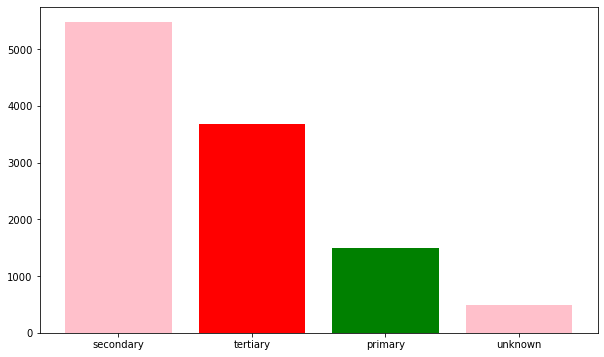

In [85]:
plt.figure(figsize = (10, 6))
plt.bar(education_key, education_value, data = bank, color = ['pink', 'red', 'green'])
plt.show()

In [86]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


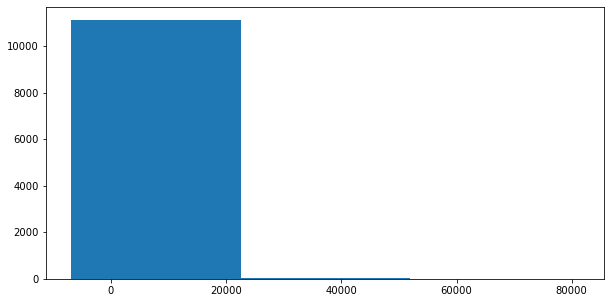

In [87]:
plt.figure(figsize = (10, 5))
plt.hist(bank['balance'], bins = 3)
plt.show()

In [88]:
bank['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [89]:
bank['loan'].value_counts(), bank.shape

(no     9702
 yes    1460
 Name: loan, dtype: int64,
 (11162, 17))

# Random Forest Apply

In [90]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [95]:
x = bank[['age']]
y = bank[['balance']]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [101]:
from sklearn.ensemble import RandomForestRegressor 

In [105]:
rfc = RandomForestRegressor()

In [106]:
rfc

RandomForestRegressor()

In [107]:
rfc.fit(x_train, y_train)

/var/folders/gr/9w8v_1fn48ddjgbpp0c4s5cr0000gn/T/ipykernel_1386/2446813824.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestRegressor()

In [108]:
y_pred = rfc.predict(x_test)

In [109]:
y_pred

array([1560.18930707, 1390.60059037, 1243.79433712, ..., 1237.65078951,
       1402.0516757 , 1773.61428418])

In [110]:
y_test.head(), y_pred[0:5]

(      balance
 5693        0
 2232      882
 5982      613
 1453        0
 4953     5115,
 array([1560.18930707, 1390.60059037, 1243.79433712, 1560.18930707,
        1312.89083094]))

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
mean_squared_error(y_test, y_pred)

8965579.16276089